In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
print("This is N=10 time steps with U being recorded every other time step")

This is N=10 time steps with U being recorded every other time step


In [3]:
x = np.linspace(0,2*pi,10)
t = np.array([0,1.74533,3.49066,5.23599,6.28319])
U = np.array([[0,0.642788,0.984808,0.866025,0.34202,-0.34202,
-0.866025,-0.984808,-0.642788,0],[-2.09065
,-1.37091
,-0.0096977
,1.35605
,2.08728
,1.86194
,0.443985
,0.927428
,-6.25444
,3.04901],[-1.50084
,-3.8575
,-4.68225
,-1.02807
,-9.60423
,35.4303
,-70.6506
,117.164
,-99.9148
,38.6439],[-4.79974
,67.1201
,-240.007
,669.438
,-1495.03
,2450.96
,-2971.66
,2482.88
,-1251.79
,292.887],[-1170.07
,3419.56
,-7996.08
,15226.5
,-23126.7
,27327.3
,-24279.8
,15167.1
,-5956.97
,1389.14
]])

In [4]:
print(U[2])

[ -1.50084  -3.8575   -4.68225  -1.02807  -9.60423  35.4303  -70.6506
 117.164   -99.9148   38.6439 ]


In [5]:
dx = x[1]-x[0]
dt = t[1]-t[0]

sol_0 = np.sin(x-t[0])

sol_1 = np.sin(x-t[1])

sol_2 = np.sin(x-t[2])

sol_3 = np.sin(x-t[3])

sol_4 = np.sin(x-t[4])

#sol_5 = np.sin(x-t[5])


print(dx)
print(dt)

0.6981317007977318
1.74533


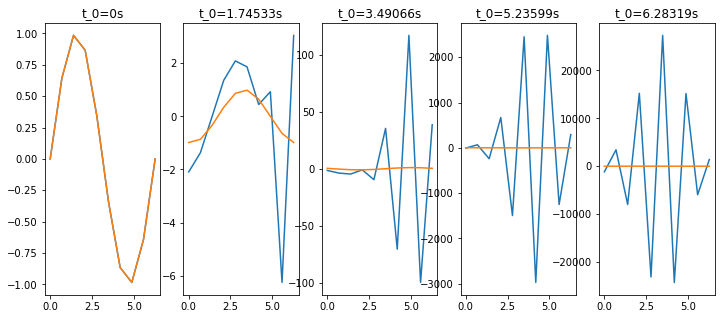

In [6]:
fig, ax = pyplot.subplots(1,5, figsize=(12, 5))
ax[0].set_title("t_0=0s")
ax[1].set_title("t_0="+str(t[1])+"s")
ax[2].set_title("t_0="+str(t[2])+"s")
ax[3].set_title("t_0="+str(t[3])+"s")
ax[4].set_title("t_0="+str(t[4])+"s")
#ax[5].set_title("t_0="+str(t[5])+"s")
ax[0].plot(x,U[0])
ax[0].plot(x,sol_0)
ax[1].plot(x,U[1])
ax[1].plot(x,sol_1)
ax[2].plot(x,U[2])
ax[2].plot(x,sol_2)
ax[3].plot(x,U[3])
ax[3].plot(x,sol_3)
ax[4].plot(x,U[4])
ax[4].plot(x,sol_4)
#ax[5].plot(x,U[5])
#ax[5].plot(x,sol_5)

In [7]:
f_x = np.array([[abs(sol_0-U[0])],[abs(sol_1-U[1])],[abs(sol_2-U[2])],[abs(sol_3-U[3])],[abs(sol_4-U[4])]])#,[abs(sol_5-U[5])]])
delta_x  = [None]*len(x)

for i in range(len(x)):
    delta_x[i] = max(x[i],dx)
    

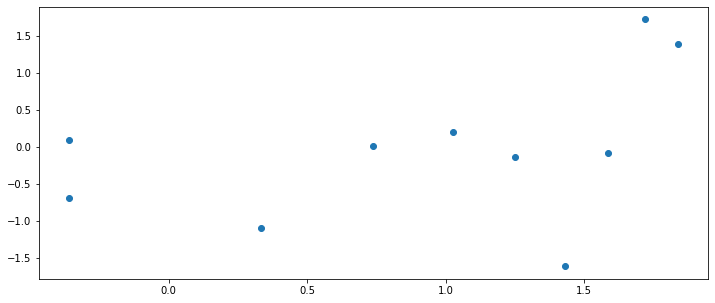

In [8]:
log_f = np.log(f_x[1])
log_delta= np.log(delta_x)


fig, ax = pyplot.subplots(1,1, figsize=(12, 5))
#ax.set_ylim(-20,-12)
ax.scatter(log_delta,log_f[0])

In [9]:
print(log_f)
print(log_delta)

[[ 0.10060738 -0.68342614 -1.10164745  0.01393304  0.19987899 -0.13109765
  -1.61543998 -0.07534092  1.72484532  1.39471323]]
[-0.35934751 -0.35934751  0.33379967  0.73926478  1.02694685  1.2500904
  1.43241196  1.58656264  1.72009403  1.83787707]


In [10]:
print((abs(log_f[0][8]-log_f[0][6]))/(log_delta[8]-log_delta[6]))

11.611030429898758


### The observation of the slope of the line above  varies with the largest being at the last time step and a convergence of 11.6 . I also obeserved that with each sucessive time step the stability of the the Center differencing method  gets less stable. With the 10th and final time step being the least stable. Even less stable than the Center differencing method

In [11]:
dUdx = [None]*len(U[0])

for i in range(len(U[0])):
    
    if i==(len(U[0])-1):
        dUdx[i] = (U[0][0]-U[0][i])/(dx)
        continue
    dUdx[i] = (U[0][i+1]-U[0][i])/(dx)

In [12]:
print(dUdx)

[0.9207259880413791, 0.4899075627266104, -0.1701441144475614, -0.7505818735938177, -0.9798151254532208, -0.7505818735938177, -0.1701441144475614, 0.4899075627266104, 0.9207259880413791, 0.0]


In [13]:
dUdt = [None]*len(U[0])

for i in range(len(U[0])):
    
    dUdt[i] = -1*dUdx[i]

In [14]:
U_1 = [None]*len(U[0])
for i in range(len(U[0])):
    
    U_1[i] = U[0][i]+dUdt[i]*.34906585

In [15]:
print(U_1)

[-0.32139399963275384, 0.47177800019540744, 1.0441994999321353, 1.1280274997006186, 0.6840399996091852, -0.08001750029938148, -0.8066335000678647, -1.1558179998045925, -0.9641819996327539, 0.0]


In [16]:
dUdx_1 = [None]*len(U_1)

for i in range(len(U_1)):
    
    if i==(len(U_1)-1):
        dUdx_1[i] = (U_1[0]-U_1[i])/(dx)
        continue
    dUdx_1[i] = (U_1[i+1]-U_1[i])/(dx)
    
    
dUdt_1 = [None]*len(U_1)

for i in range(len(U_1)):
    dUdt_1[i] = -1*dUdx_1[i]
    
U_2 = [None]*len(U_1)
for i in range(len(U_1)):
    
    U_2[i] = U_1[i]+dUdt_1[i]*.34906585

In [17]:
print(U_2)

[-0.7179799990936688, 0.18556725065408697, 1.0022855000957875, 1.3500212494926704, 1.066068749126937, 0.2832904991697202, -0.6320412503990016, -1.2516359997810238, -1.4462729988982614, 0.16069699963275383]
